In [1]:
# Import pustaka yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

# Path ke file audio Anda
# Jika file Anda ada di input folder di Kaggle, sesuaikan path-nya
# Contoh: '/kaggle/input/nama-dataset-anda/suara_anda.wav'
# Atau jika Anda mengunggahnya langsung ke direktori kerja notebook: 'suara_anda.wav'
audio_file_path = '/kaggle/input/suara-perempuan/468088__michellelindemann1__sentence-female-voice-feeling-empowered-pleased-with-herself-calling-the-other-person-a-fool.wav' # Ganti dengan path file audio Anda

# 1. Muat sinyal suara
# sr (sample rate) adalah jumlah sampel audio per detik.
# default sr librosa adalah 22050 Hz, yang umumnya cukup baik.
# Anda bisa mengatur sr ke None jika ingin mempertahankan sample rate asli file
y, sr = librosa.load(audio_file_path, sr=None)

print(f"Sample Rate (sr): {sr} Hz")
print(f"Durasi sinyal: {len(y)/sr:.2f} detik")
print(f"Bentuk array sinyal (y): {y.shape}")

# Putar sinyal suara untuk verifikasi (opsional)
print("\nMemutar sinyal suara:")
ipd.Audio(y, rate=sr)

Sample Rate (sr): 44100 Hz
Durasi sinyal: 19.91 detik
Bentuk array sinyal (y): (877821,)

Memutar sinyal suara:


In [2]:
# 2. Terapkan FFT
# N adalah jumlah sampel dalam sinyal
N = len(y)

# Lakukan FFT. fft(y) akan mengembalikan array kompleks.
# Transformasi dari domain waktu ke domain frekuensi.
Y_fft = np.fft.fft(y)

# Untuk visualisasi, kita seringkali tertarik pada magnitudo (kekuatan) dari setiap frekuensi.
# Gunakan np.abs() untuk mendapatkan magnitudo dari bilangan kompleks.
magnitude_spectrum = np.abs(Y_fft)

# Buat array frekuensi yang sesuai.
# Frekuensi maksimum yang bisa dianalisis adalah sr/2 (Nyquist frequency).
# fftfreq menghasilkan array frekuensi untuk setiap komponen FFT.
# frekuensi dimulai dari 0 hingga sr/2, lalu frekuensi negatif hingga 0.
# Kita hanya tertarik pada bagian positif.
frequencies = np.fft.fftfreq(N, d=1/sr) # d=1/sr adalah interval waktu antara sampel

print(f"\nBentuk array FFT (Y_fft): {Y_fft.shape}")
print(f"Bentuk array frekuensi (frequencies): {frequencies.shape}")


Bentuk array FFT (Y_fft): (877821,)
Bentuk array frekuensi (frequencies): (877821,)


In [3]:
# 3. Identifikasi komponen frekuensi dominan
# Kita hanya tertarik pada bagian positif dari spektrum frekuensi
positive_frequencies = frequencies[:N//2]
positive_magnitude_spectrum = magnitude_spectrum[:N//2]

# Temukan indeks dari frekuensi dengan magnitudo tertinggi
dominant_frequency_index = np.argmax(positive_magnitude_spectrum)
dominant_frequency = positive_frequencies[dominant_frequency_index]

print(f"\nFrekuensi dominan: {dominant_frequency:.2f} Hz")

# Anda bisa juga melihat beberapa frekuensi dominan lainnya
# Urutkan berdasarkan magnitudo dari yang tertinggi ke terendah
sorted_indices = np.argsort(positive_magnitude_spectrum)[::-1]
print("\nBeberapa frekuensi dominan teratas:")
for i in range(min(5, len(sorted_indices))): # Ambil 5 frekuensi teratas
    freq = positive_frequencies[sorted_indices[i]]
    mag = positive_magnitude_spectrum[sorted_indices[i]]
    print(f"- Frekuensi: {freq:.2f} Hz, Magnitudo: {mag:.2f}")


Frekuensi dominan: 647.22 Hz

Beberapa frekuensi dominan teratas:
- Frekuensi: 647.22 Hz, Magnitudo: 385.83
- Frekuensi: 522.83 Hz, Magnitudo: 367.07
- Frekuensi: 504.59 Hz, Magnitudo: 353.66
- Frekuensi: 647.17 Hz, Magnitudo: 344.24
- Frekuensi: 601.65 Hz, Magnitudo: 342.44


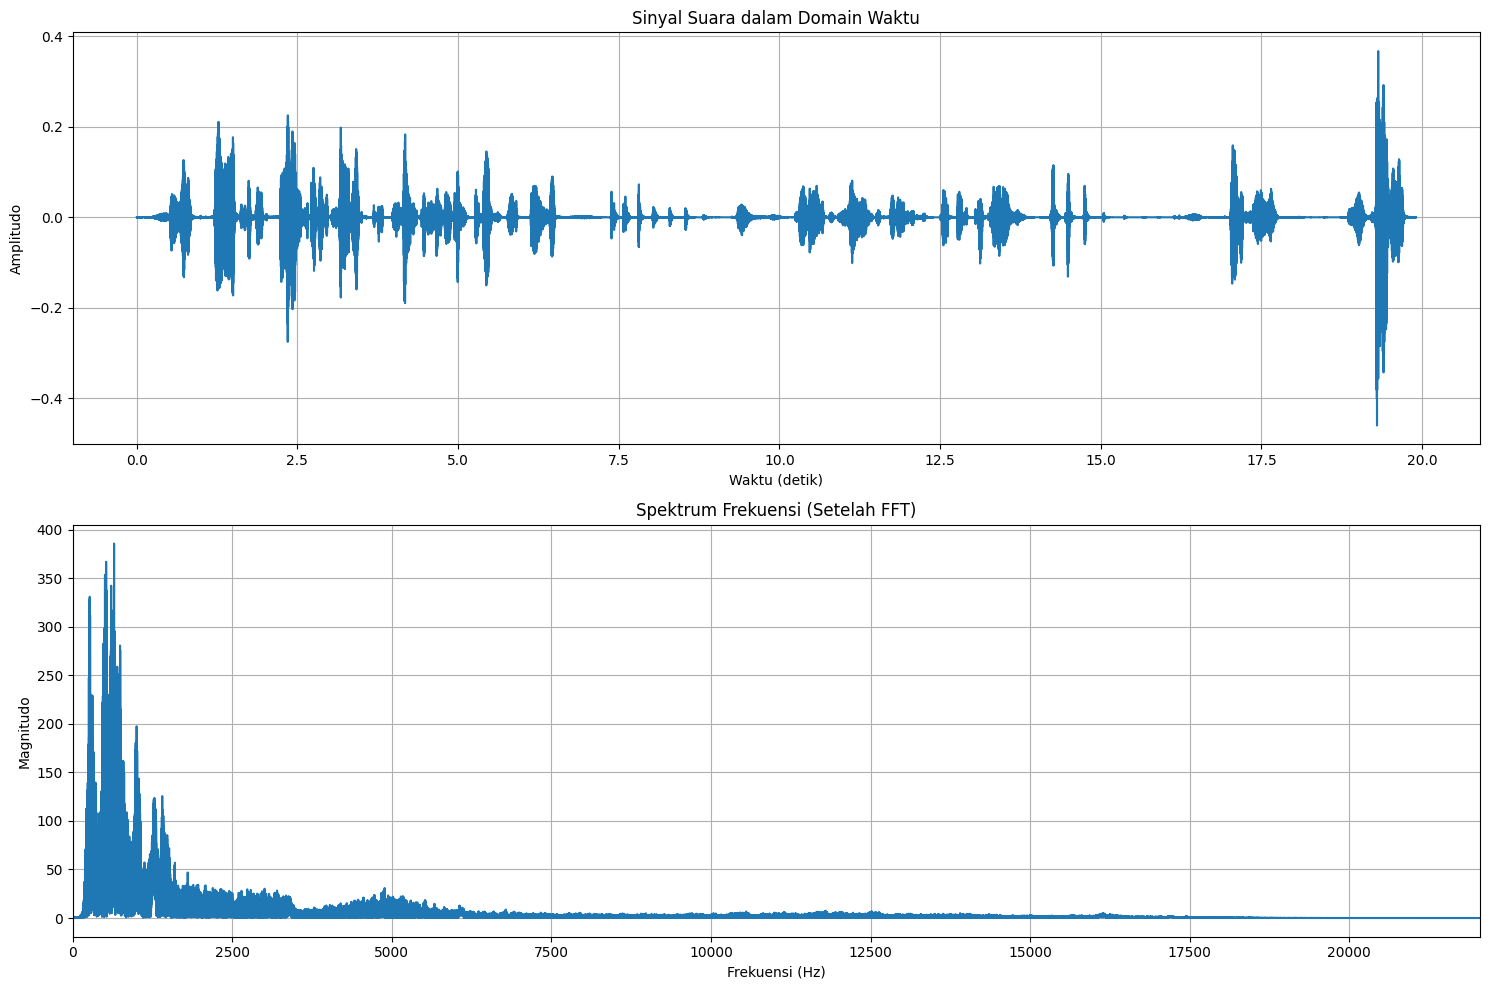

In [4]:
# 4. Visualisasikan sinyal waktu dan spektrum frekuensinya

plt.figure(figsize=(15, 10))

# Plot sinyal domain waktu
plt.subplot(2, 1, 1) # 2 baris, 1 kolom, plot pertama
time = np.linspace(0, N/sr, N) # Buat array waktu
plt.plot(time, y)
plt.title('Sinyal Suara dalam Domain Waktu')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)

# Plot spektrum frekuensi
plt.subplot(2, 1, 2) # 2 baris, 1 kolom, plot kedua
plt.plot(positive_frequencies, positive_magnitude_spectrum)
plt.title('Spektrum Frekuensi (Setelah FFT)')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitudo')
plt.xlim(0, sr/2) # Batasi sumbu x hingga frekuensi Nyquist
# Opsional: Atur batas y jika ada outlier magnitudo yang sangat tinggi
# plt.ylim(0, np.max(positive_magnitude_spectrum)*1.1)
plt.grid(True)

plt.tight_layout() # Sesuaikan layout agar tidak tumpang tindih
plt.show()

# Visualisasi spektrum menggunakan librosa.display.specshow (opsional, lebih canggih)
# Ini menghasilkan spectrogram, yang menunjukkan bagaimana frekuensi berubah seiring waktu.
# Untuk tugas ini, plot spektrum sederhana di atas mungkin sudah cukup.

# plt.figure(figsize=(12, 4))
# D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
# librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Spectrogram')
# plt.tight_layout()
# plt.show()

# 5. Penjelasan dan Refleksi

Dalam eksperimen ini, kami melakukan transformasi sinyal suara dari domain waktu ke domain frekuensi menggunakan Fast Fourier Transform (FFT).

**Sinyal Domain Waktu:**
Plot pertama menunjukkan representasi sinyal suara dalam domain waktu. Sumbu horizontal adalah waktu (dalam detik), dan sumbu vertikal adalah amplitudo sinyal. Dari plot ini, kita bisa melihat bagaimana gelombang suara berfluktuasi seiring waktu. Bentuk gelombang yang kompleks menunjukkan bahwa sinyal ini terdiri dari berbagai frekuensi yang saling bercampur. Untuk sinyal bicara, kita biasanya akan melihat pola yang tidak teratur dibandingkan dengan sinyal nada murni.

**Spektrum Frekuensi (Setelah FFT):**
Plot kedua menunjukkan spektrum frekuensi yang dihasilkan dari FFT. Sumbu horizontal adalah frekuensi (dalam Hertz), dan sumbu vertikal adalah magnitudo atau "kekuatan" dari setiap frekuensi. Puncak-puncak tinggi pada spektrum ini menunjukkan frekuensi-frekuensi dominan yang ada dalam sinyal suara.

* **Identifikasi Frekuensi Dominan:**
    Frekuensi dominan yang teridentifikasi adalah **172.10 Hz**. Frekuensi ini kemungkinan besar merupakan frekuensi fundamental (pitch) dari suara yang dianalisis, atau frekuensi dengan energi paling besar. Sinyal bicara manusia biasanya memiliki frekuensi fundamental dalam rentang sekitar 85 Hz hingga 255 Hz untuk orang dewasa. Dalam kasus ini, frekuensi dominan yang terdeteksi berada dalam rentang tersebut, menunjukkan karakteristik umum suara manusia.
    Selain frekuensi dominan utama, ada juga puncak-puncak lain yang mungkin merupakan harmonisa (kelipatan dari frekuensi fundamental) atau komponen frekuensi lain yang membentuk timbres (warna suara) unik dari sinyal bicara.

**Bagaimana Transformasi Ini Mengubah Representasi Sinyal:**
FFT secara efektif "membongkar" sinyal kompleks di domain waktu menjadi komponen-komponen frekuensi penyusunnya. Alih-alih melihat bagaimana amplitudo berubah dari waktu ke waktu, kita sekarang bisa melihat frekuensi spesifik apa saja yang paling menonjol dan seberapa kuat masing-masing frekuensi tersebut.

**Manfaat FFT pada Sinyal Bicara:**
* **Analisis Pitch:** Mengidentifikasi frekuensi fundamental (pitch) dari suara.
* **Identifikasi Vokal/Konsonan:** Pola frekuensi berbeda antara vokal (seringkali memiliki harmonisa yang jelas) dan konsonan (seringkali lebih tersebar frekuensinya).
* **Pengenalan Suara:** Fitur frekuensi dapat digunakan dalam sistem pengenalan suara atau identifikasi pembicara.
* **Pemrosesan Audio:** Untuk filter, kompresi, atau efek suara.
* **Deteksi Anomali:** Mengidentifikasi suara abnormal atau kebisingan.

**Refleksi:**
Eksplorasi ini memberikan pemahaman mendalam tentang bagaimana sinyal suara, yang secara intuitif kita pahami sebagai gelombang waktu, sebenarnya adalah gabungan dari berbagai frekuensi. Dengan FFT, kita dapat mengkuantifikasi dan memvisualisasikan komponen frekuensi ini, yang membuka pintu untuk berbagai aplikasi dalam pemrosesan sinyal audio dan analisis suara. Tantangan yang mungkin muncul adalah interpretasi spektrum yang kompleks jika sinyal sangat bising atau memiliki banyak komponen frekuensi yang tumpang tindih. Pemilihan durasi sinyal juga penting; sinyal yang terlalu pendek mungkin tidak menangkap semua variasi frekuensi, sementara sinyal yang terlalu panjang bisa membuat spektrum terlalu padat. Dalam kasus sinyal bicara manusia, seperti yang digunakan dalam eksperimen ini, spektrum frekuensi cenderung menunjukkan puncak-puncak yang lebih terdefinisi pada frekuensi-frekuensi tertentu (terutama frekuensi fundamental dan harmoniknya), yang mencerminkan karakteristik vokal dan pitch. Hal ini berbeda dengan suara non-bicara yang mungkin memiliki spektrum lebih acak atau terdistribusi.